### 0.导入函数库

In [2]:
from obspy.core import read
from obspy.core import UTCDateTime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

### 1.读波形数据

3 Trace(s) in Stream:
BW.RJOB..EHZ | 2009-08-24T00:20:03.000000Z - 2009-08-24T00:20:18.990000Z | 100.0 Hz, 1600 samples
BW.RJOB..EHZ | 2009-08-24T00:20:16.990000Z - 2009-08-24T00:20:25.990000Z | 100.0 Hz, 901 samples
BW.RJOB..EHZ | 2009-08-24T00:20:28.990000Z - 2009-08-24T00:20:32.990000Z | 100.0 Hz, 401 samples


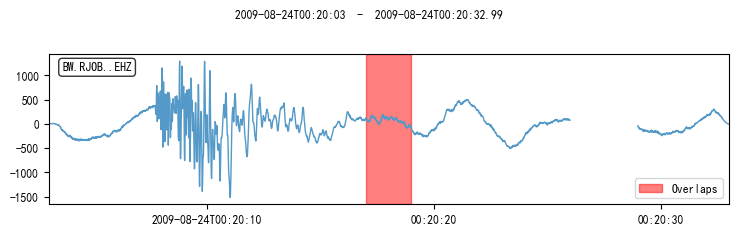

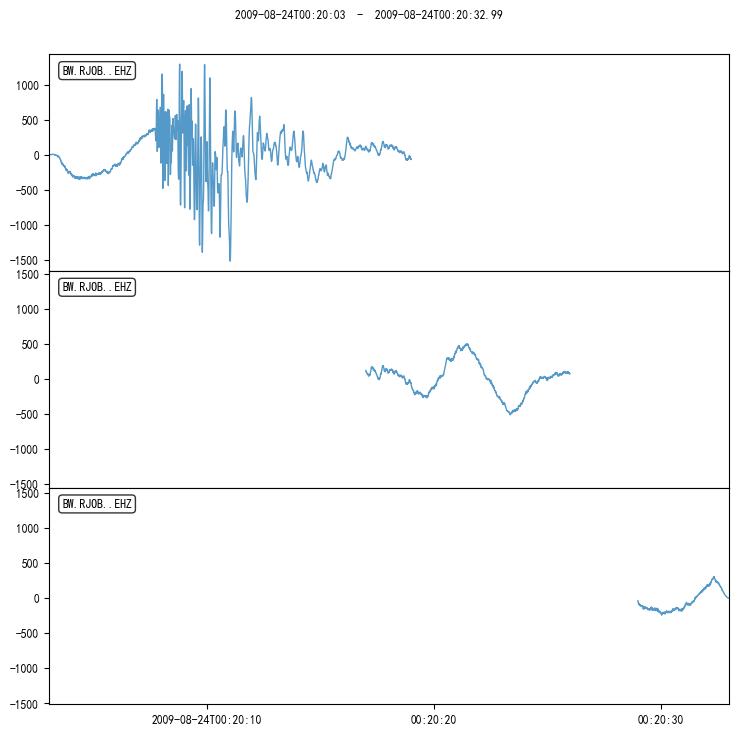

In [3]:
st = read("../data/gap_test_1.mseed")
print(st)
fig1 = st.plot(method="full", color="#5499C7", figsize=(8,5))
fig2 = st.plot(automerge=False, color="#5499C7", figsize=(8,2))

### 2.去重复、填充数据

***取重复、补充断点***

1 Trace(s) in Stream:
BW.RJOB..EHZ | 2009-08-24T00:20:03.000000Z - 2009-08-24T00:20:32.990000Z | 100.0 Hz, 3000 samples


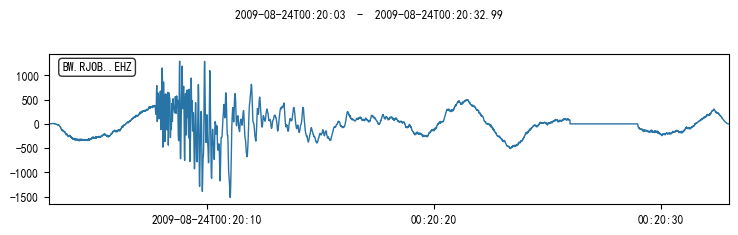

In [4]:
st = read("../data/gap_test_1.mseed")
st = st.merge(fill_value=0)
print(st)
fig = st.plot(method="full", color="#2874A6", figsize=(8,5))

***断点填充不同类型数据***

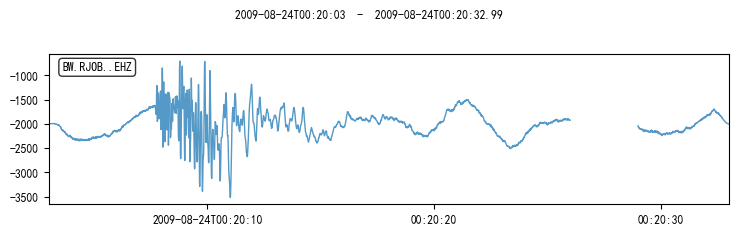

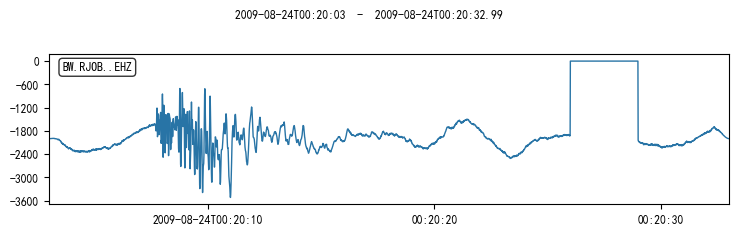

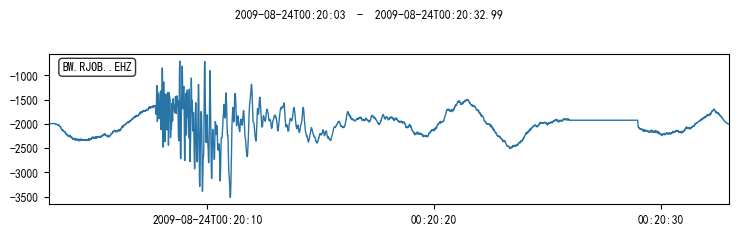

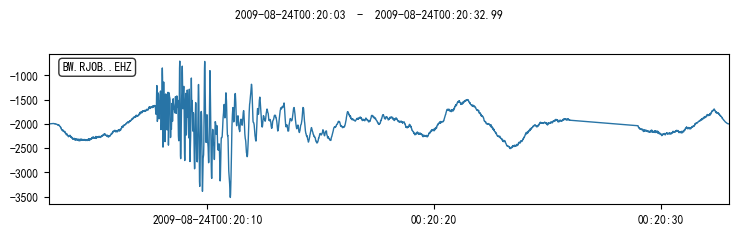

In [6]:
st = read("../data/gap_test_0.mseed")

st_org = st.copy()
st_org.merge()
fig_org = st_org.plot(color="#5499C7",label="Original")

st_zero = st.copy()
st_zero.merge(fill_value=0)
fig_zero = st_zero.plot(color="#2874A6",label="zero")

st_late = st.copy()
st_late.merge(fill_value="latest")
fig_late = st_late.plot(color="#2874A6",label="latest")

st_interpolate = st.copy()
st_interpolate.merge(fill_value="interpolate")
fig_int = st_interpolate.plot(color="#2874A6",label="interpolate")

### 3.去均值

 ***simple***

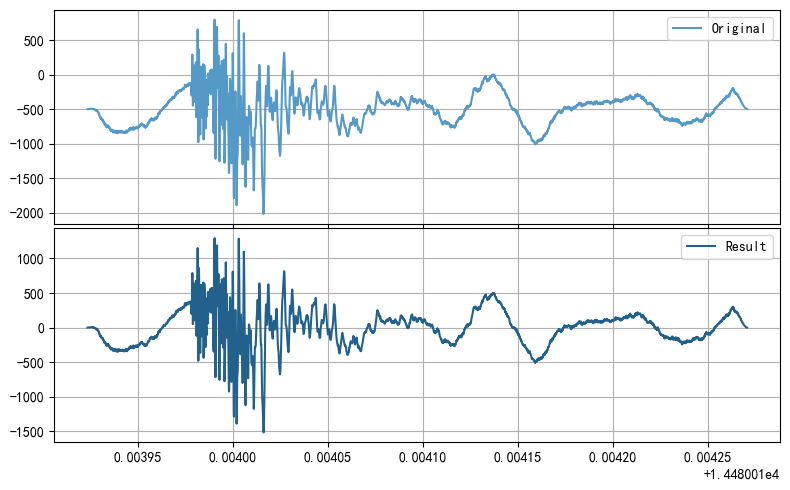

In [7]:
tr = read("../data/detrend_test_0.mseed")[0]

tr_det = tr.copy()
# 调用detrend函数
tr_det.detrend("simple")
# 绘图
fig, ax = plt.subplots(nrows=2, sharex='col', figsize=(8,5))
ax[0].plot(tr.times("matplotlib"), tr.data, color='#5499C7', label="Original")
ax[0].legend(loc="best")
ax[0].label_outer()
ax[0].grid()
ax[1].plot(tr_det.times("matplotlib"), tr_det.data, color='#21618C', label="Result")
ax[1].legend(loc="best")
ax[1].label_outer()
ax[1].grid()

plt.tight_layout(h_pad=0)
plt.show()

 ***demean***

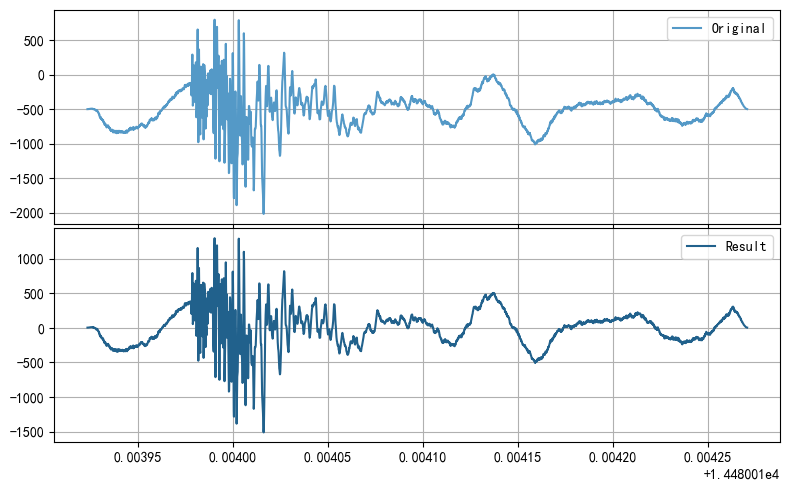

In [8]:
tr = read("../data/detrend_test_0.mseed")[0]

tr_det = tr.copy()
# 调用detrend函数
tr_det.detrend("demean")
# 绘图
fig, ax = plt.subplots(nrows=2, sharex='col', figsize=(8,5))
ax[0].plot(tr.times("matplotlib"), tr.data, color='#5499C7', label="Original")
ax[0].legend(loc="best")
ax[0].label_outer()
ax[0].grid()
ax[1].plot(tr_det.times("matplotlib"), tr_det.data, color='#21618C', label="Result")
ax[1].legend(loc="best")
ax[1].label_outer()
ax[1].grid()

plt.tight_layout(h_pad=0)
plt.show()

### 4.包含低频信号数据去倾向

 ***simple***
*****
 trace.detrend("simple")
*****

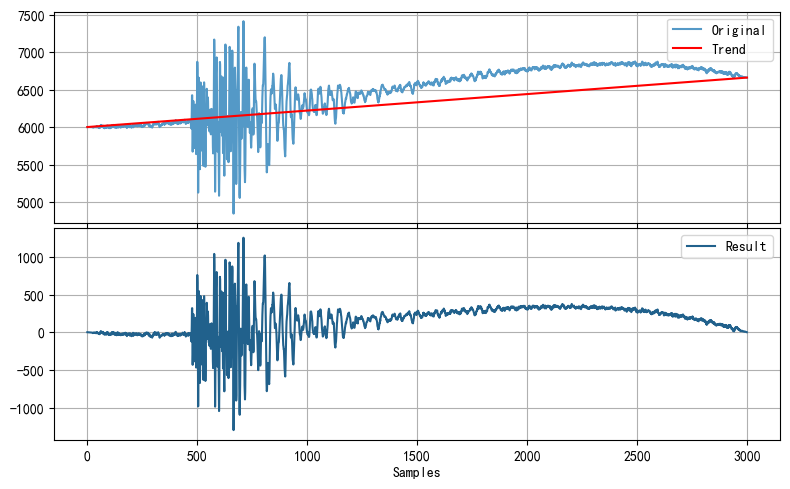

In [9]:
tr=read("../data/detrend_test_1.mseed")[0]

tr_det = tr.copy()
# 调用detrend函数
tr_det.detrend("simple")
# 绘图
fig, ax = plt.subplots(nrows=2, sharex='col', figsize=(8, 5))
ax[0].plot(tr.data, color='#5499C7', label="Original")
ax[0].plot([0, len(tr.data)], [tr.data[0], tr.data[-1]], color='red', label="Trend")
ax[0].legend(loc="best")
ax[0].label_outer()
ax[0].grid()
ax[1].plot(tr_det.data, color='#21618C', label="Result")
ax[1].legend(loc="best")
ax[1].label_outer()
ax[1].set_xlabel("Samples")
ax[1].grid()

plt.tight_layout(h_pad=0)
plt.show()

***demean***
 *****
 trace.detrend("demean")
 *****

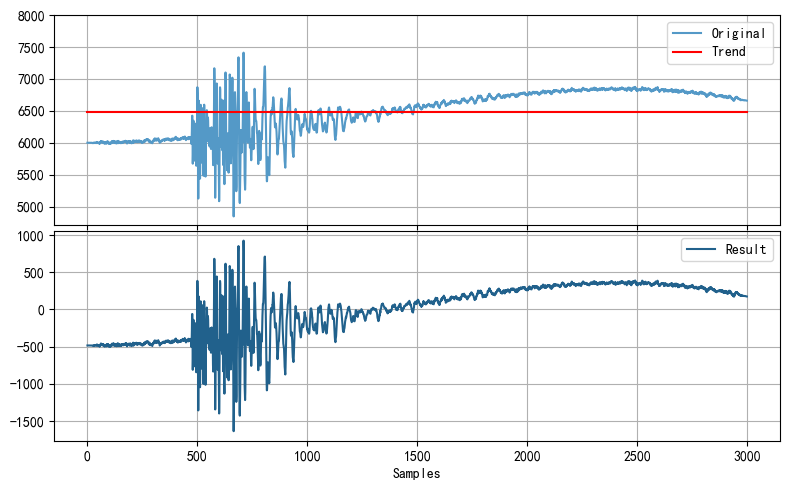

In [10]:
tr=read("../data/detrend_test_1.mseed")[0]

tr_det = tr.copy()
# 调用detrend函数
tr_det.detrend("demean")
# 绘图
fig, ax = plt.subplots(nrows=2, sharex='col', figsize=(8, 5))
ax[0].plot(tr.data, color='#5499C7', label="Original")
ax[0].plot([0, len(tr.data)], [np.mean(tr.data), np.mean(tr.data)], color='red', label="Trend")
ax[0].legend(loc="best")
ax[0].label_outer()
ax[0].set_yticks(ax[0].get_yticks()[1:])
ax[0].grid()
ax[1].plot(tr_det.data, color='#21618C', label="Result")
ax[1].legend(loc="best")
ax[1].label_outer()
ax[1].set_xlabel("Samples")
ax[1].grid()

plt.tight_layout(h_pad=0)
plt.show()

 ***polynomial***
 *****
 trace.detrend("polynomial", order=3)
 *****

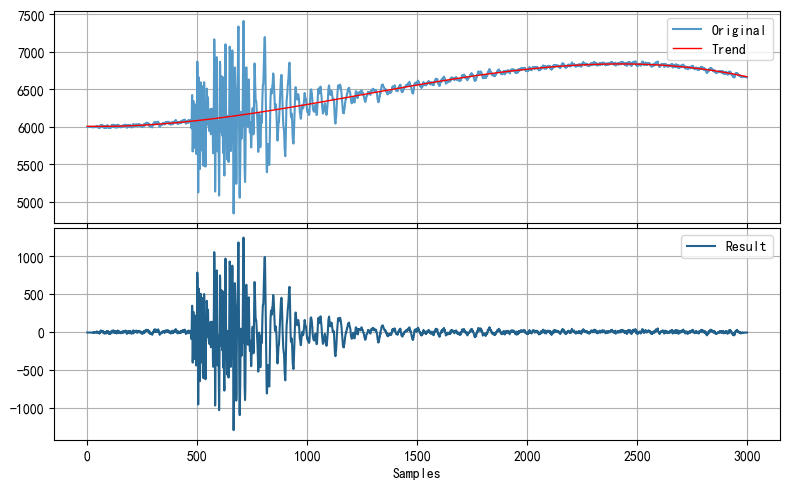

In [11]:
tr=read("../data/detrend_test_1.mseed")[0]
data = tr.data

x = np.arange(len(data))
fit = np.polyval(np.polyfit(x, data, deg=3), x)

fig, ax = plt.subplots(2, 1, figsize=(8, 5))
plt.subplots_adjust(hspace=0)
ax[0].plot(data, color="#5499C7", label="Original")
ax[0].plot(fit, color="red", lw=1, label="Trend")
ax[0].legend(loc="best")
ax[0].label_outer()
ax[0].grid()
ax[1].plot(data - fit, color="#21618C", label="Result")
ax[1].legend(loc="best")
ax[1].label_outer()
ax[1].set_xlabel("Samples")
ax[1].grid()

plt.tight_layout(h_pad=0)
plt.show()

***加入低频正弦波噪声***
```
i=0
for t in tr.data:
    tr.data[i] = t + 3000*np.sin(2*np.pi*i/500)
    i = i+1
```

 ***spline***
****
trace.detrend("spline", order=3, dspline=50)
****

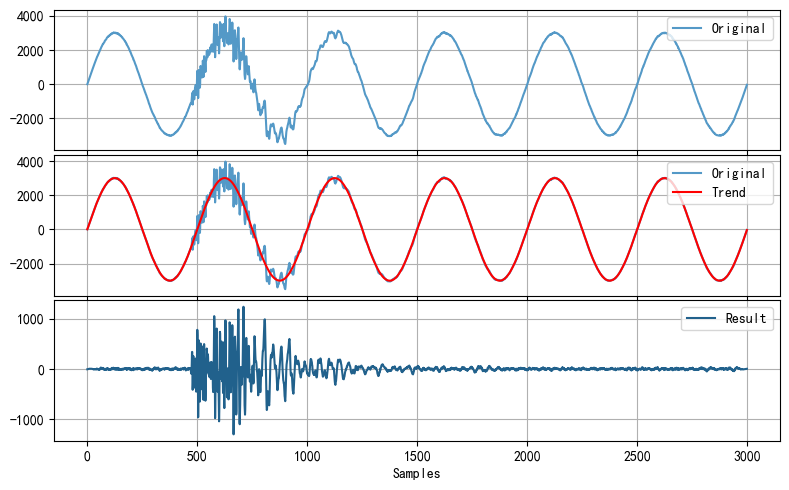

In [12]:
from scipy.interpolate import LSQUnivariateSpline
tr=read("../data/detrend_test_2.mseed")[0]
data=tr.data
dspline = 50 
order = 2

if not np.issubdtype(data.dtype, np.floating):
    data = np.require(data, dtype=np.float64)

x = np.arange(len(data))
splknots = np.arange(dspline / 2.0, len(data) - dspline / 2.0 + 2, dspline)

spl = LSQUnivariateSpline(x=x, y=data, t=splknots, k=order)
fit = spl(x)

fig, ax = plt.subplots(3, 1, figsize=(8, 5))
plt.subplots_adjust(hspace=0)
ax[0].plot(data, color="#5499C7", label="Original")
ax[0].legend(loc="best")
ax[0].label_outer()
ax[0].grid()
ax[1].plot(data, color="#5499C7", label="Original")
ax[1].plot(fit, color="red", label="Trend")
ax[1].legend(loc="best")
ax[1].label_outer()
ax[1].grid()
ax[2].plot(data - fit, color="#21618C", label="Result")
ax[2].legend(loc="best")
ax[2].label_outer()
ax[2].set_xlabel("Samples")
ax[2].grid()

plt.tight_layout(h_pad=0)
plt.show()

### 4.重采样
在数字世界中，我们既没有连续信号也没有周期信号。我们总是处理采样信号。因此，我们需要定义一些描述采样的术语：
采样间隔是单个采样值之间的时间距离Δt。信号中一个采样k在时间轴上的位置因此表示为t=kΔt，其中k=[1,2,...,N]，N是信号中的最大采样数。
信号周期由T=NΔt给出。采样率也称为采样频率，是Δf=1/T。
采样定理指出，为了正确重现信号的最高频率，每个周期至少需要2个采样。换句话说：只有当信号不包含高于采样频率一半的频率分量时，才能正确地重现信号。这就是奈奎斯特频率的定义：

fNy=1/(2Δt)=Δf/2

这个定理的一个重要推论是，在将数据重新采样到较低的采样率之前，有必要对其进行低通滤波处理。低通滤波器的截止频率最大为新采样率的奈奎斯特频率。如果不考虑这个必要性，就会有混叠效应。当处理谱分析时，应该清楚，它基本上是基于傅里叶级数/傅里叶变换的特性和属性。

#### 奈奎斯特频率与混叠
在下面的单元格中，我们首先创建一个由两个不同频率（4 Hz和8 Hz）组成的信号，并以20 Hz的采样率进行采样（黑色）。然后，我们以两种方式将其降采样至10 Hz：首先，我们只是降低采样率（红色）；其次，在降采样之前，我们对数据进行低通滤波（绿色）。最后，将所有三种信号在时域和频域中绘制出来，以观察其效果。

```
1.原始数据和降采样数据的奈奎斯特频率分别是多少？
2.将原始数据（黑色）与纯降采样数据（红色）进行比较，你观察到了什么，能解释其中的原因吗？
3.将原始数据（黑色）与低通滤波后的降采样信号进行比较，现在你观察到了什么？
```

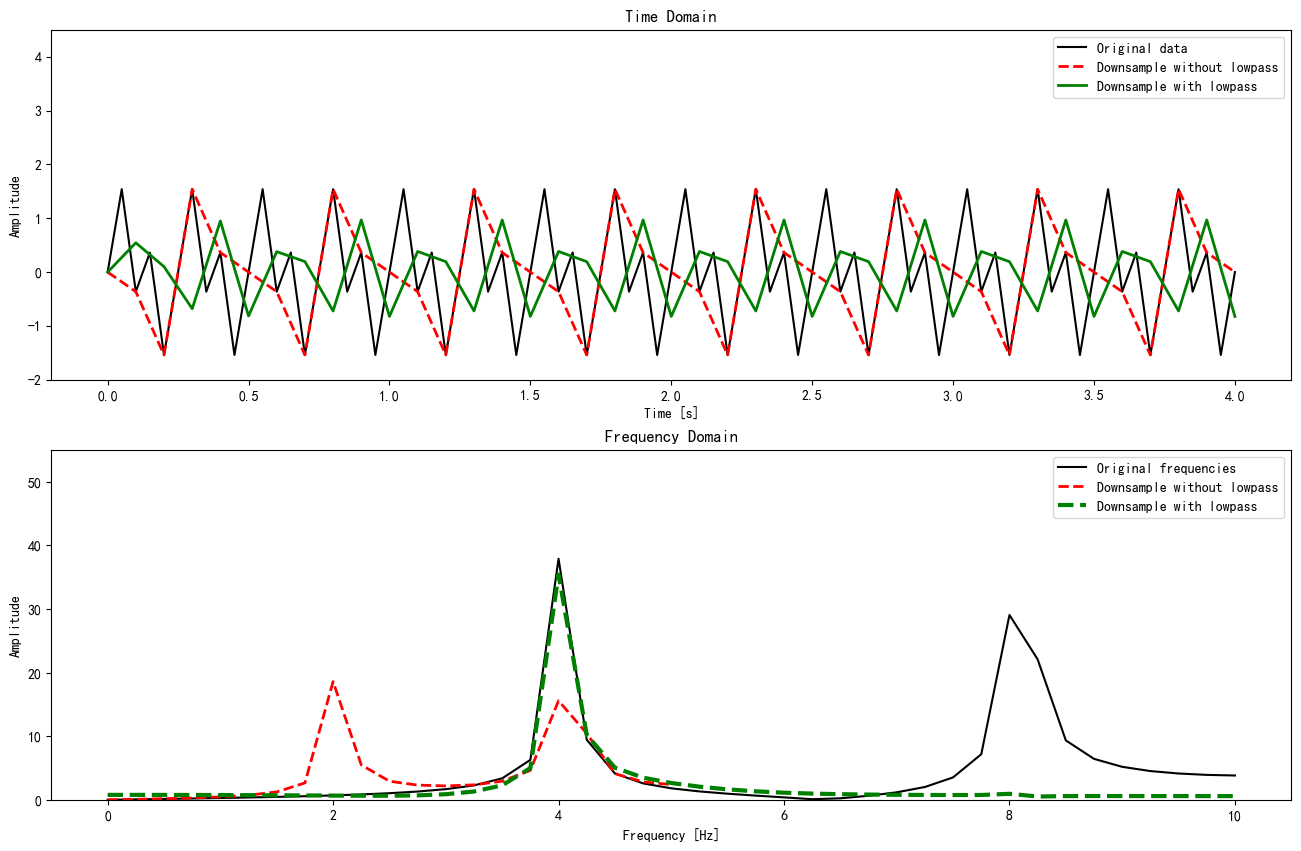

In [5]:
%matplotlib inline
import obspy
from obspy.signal.invsim import cosine_taper 
from obspy.signal.filter import lowpass
from obspy.clients.fdsn import Client
from obspy.core import UTCDateTime
from matplotlib import rcParams
import numpy as np
import matplotlib.pylab as plt
plt.rcParams['figure.figsize'] = 16, 10

# Cell 1: downsampling + Nyquist
npts = 512                              # number of samples
nsec = 4                                # length of signal in seconds
df = 20                                 # sampling rate
fNy = df / 2.0                          # Nyquist frequency
fg1 = 8                                 # generator frequency 1 (initial: 8 Hz)
fg2 = 4                                 # generator frequency 2 (initial: 4 Hz)
time = np.linspace(0,nsec,(nsec*df)+1)  # time axis for plotting

y  = np.sin(2 * np.pi * fg1 * time)     # set up a test signal from two frequencies
y += np.sin(2 * np.pi * fg2 * time) 

# downsample to 10 Hz by taking every second element
y_2 = y[::2]

# downsample after lowpassing the signal
y_l = lowpass(y, 5.0, df=df, corners=4, zerophase=False)
y_new = y_l[::2]

y_f = np.fft.rfft(y)                    # transform all 3 signals into frequency domain 
y_f2 = np.fft.rfft(y_2)                 # applying Fourier transformation via FFT
y_fnew = np.fft.rfft(y_l)
freq = np.linspace(0, fNy, len(y_f))    # frequency axis for plotting

# plot
plt.subplot(211)
plt.plot(time, y, 'k', label="Original data", lw=1.5)
plt.plot(time[::2], y_2, 'r--', label="Downsample without lowpass", lw=2)
plt.plot(time[::2], y_new, 'g', label="Downsample with lowpass", lw=2)
plt.legend()
plt.ylim(-2, 4.5)
plt.title('Time Domain')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(212)
plt.plot(freq, abs(y_f), 'k', label="Original frequencies", lw=1.5)
plt.plot(freq[:len(y_f2)], abs(y_f2), 'r--', label="Downsample without lowpass", lw=2)
plt.plot(freq[:len(y_fnew)], abs(y_fnew), 'g--', label="Downsample with lowpass", lw=3)
plt.legend()
plt.ylim(0, 55)
plt.title('Frequency Domain')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')

plt.show()

***resample***

Original:100.0
Result:  20.0


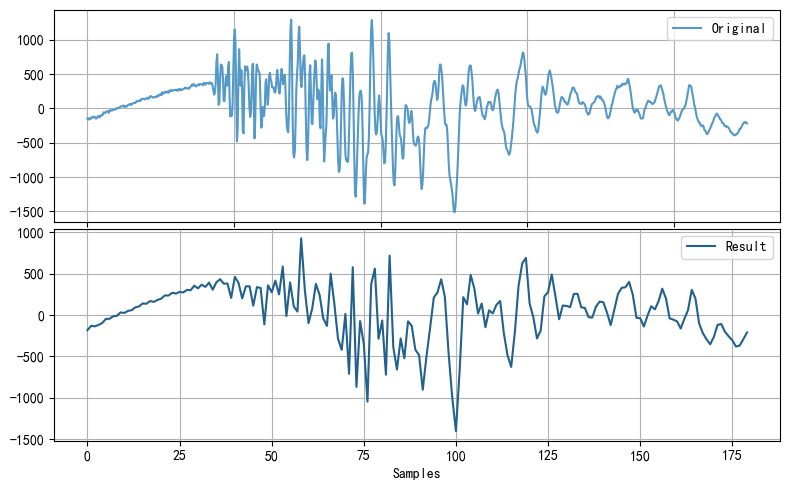

In [13]:
from obspy import UTCDateTime
tr=read("../data/detrend_test_trace.mseed")[0]
tr = tr.slice(starttime=UTCDateTime("2009-08-24T00:20:06.000000Z"), endtime=UTCDateTime("2009-08-24T00:20:15.000000Z"))

tr_resample = tr.copy()
tr_resample.resample(sampling_rate=20, window="hann", no_filter=True, strict_length=False)

print("Original:" + str(tr.stats.sampling_rate))
print("Result:  " + str(tr_resample.stats.sampling_rate))

fig, ax = plt.subplots(2, 1, figsize=(8, 5))
plt.subplots_adjust(hspace=0)
ax[0].plot(tr.data, color="#5499C7", label="Original")
ax[0].legend(loc="best")
ax[0].label_outer()
ax[0].grid()
ax[1].plot(tr_resample.data, color="#21618C", label="Result")
ax[1].legend(loc="best")
ax[1].label_outer()
ax[1].set_xlabel("Samples")
ax[1].grid()

plt.tight_layout(h_pad=0)
plt.show()

***decimate***

Original:100.0
Result:  20.0


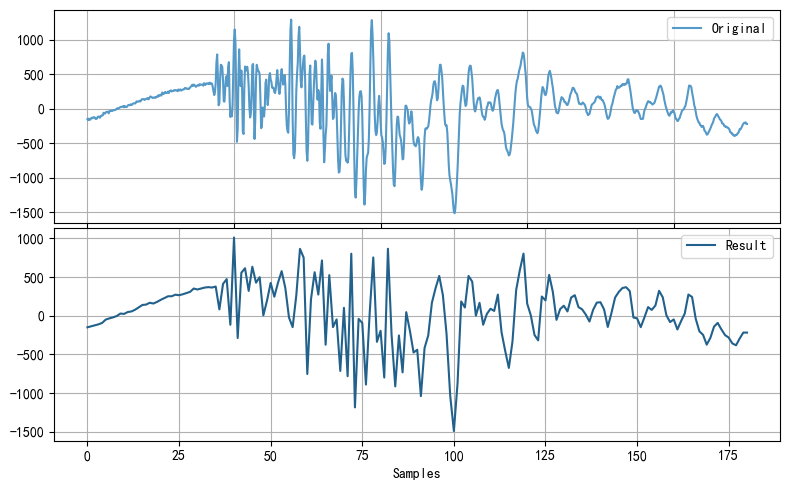

In [14]:
from obspy import UTCDateTime
tr=read("../data/detrend_test_trace.mseed")[0]
tr = tr.slice(UTCDateTime("2009-08-24T00:20:06.000000Z"), UTCDateTime("2009-08-24T00:20:15.000000Z"))

tr_resample = tr.copy()
tr_resample.decimate(factor=5, no_filter=True, strict_length=False)

print("Original:" + str(tr.stats.sampling_rate))
print("Result:  " + str(tr_resample.stats.sampling_rate))

fig, ax = plt.subplots(2, 1, figsize=(8, 5))
plt.subplots_adjust(hspace=0)
ax[0].plot(tr.data, color="#5499C7", label="Original")
ax[0].legend(loc="best")
ax[0].label_outer()
ax[0].grid()
ax[1].plot(tr_resample.data, color="#21618C", label="Result")
ax[1].legend(loc="best")
ax[1].label_outer()
ax[1].set_xlabel("Samples")
ax[1].grid()

plt.tight_layout(h_pad=0)
plt.show()

***interpolate***
```
linear | nearest | zero | slinear | quadratic | cubic | lanczos | weighted_average_slopes
```

Original:100.0
Result:  20.0


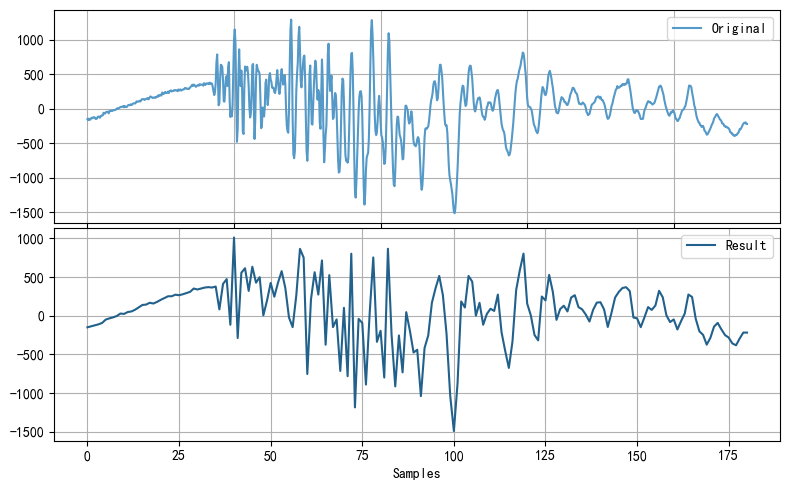

In [15]:
from obspy import UTCDateTime
tr = read("../data/detrend_test_trace.mseed")[0]
tr = tr.slice(UTCDateTime("2009-08-24T00:20:06.000000Z"), UTCDateTime("2009-08-24T00:20:15.000000Z"))

tr_resample = tr.copy()
tr_resample.interpolate(sampling_rate=20, method="slinear") 

print("Original:" + str(tr.stats.sampling_rate))
print("Result:  " + str(tr_resample.stats.sampling_rate))

fig, ax = plt.subplots(2, 1, figsize=(8, 5))
plt.subplots_adjust(hspace=0)
ax[0].plot(tr.data, color="#5499C7", label="Original")
ax[0].legend(loc="best")
ax[0].label_outer()
ax[0].grid()
ax[1].plot(tr_resample.data, color="#21618C", label="Result")
ax[1].legend(loc="best")
ax[1].label_outer()
ax[1].set_xlabel("Samples")
ax[1].grid()

plt.tight_layout(h_pad=0)
plt.show()